In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Asus
[nltk_data]     M16\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Asus
[nltk_data]     M16\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### LogisticRegression:
Imports the Logistic Regression classifier from scikit-learn, which is used for binary classification problems.

### RandomForestClassifier:
Imports the Random Forest classifier from scikit-learn, which is an ensemble learning method that constructs a multitude of decision trees and outputs the mode of the classes.

### GaussianNB: 
Imports the Gaussian Naive Bayes classifier from scikit-learn, which is based on Bayes' theorem with the assumption of independence between features.

### SVC: 
Imports the Support Vector Machine (SVM) classifier from scikit-learn, which is a powerful classification algorithm that finds the hyperplane that best separates classes in a high-dimensional space.

### KNeighborsClassifier: 
Imports the k-Nearest Neighbors (KNN) classifier from scikit-learn, which is a non-parametric method used for classification and regression tasks based on the nearest training data points.

### DecisionTreeClassifier: 
Imports the Decision Tree classifier from scikit-learn, which is a flowchart-like structure where an internal node represents a feature, the branch represents a decision rule, and each leaf node represents an outcome.

### XGBClassifier: 
Imports the XGBoost classifier from the XGBoost library, which is an implementation of gradient boosted decision trees designed for speed and performance.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, fbeta_score, precision_score, roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

### TfidfVectorizer, CountVectorizer: 
Imports the TfidfVectorizer and CountVectorizer classes, which are used to convert text data into numerical feature vectors. TfidfVectorizer calculates the TF-IDF (Term Frequency-Inverse Document Frequency) values for the text, while CountVectorizer simply counts the occurrences of each word.

### train_test_split: 
Imports the train_test_split function, which splits datasets into random train and test subsets. This function is commonly used to split data into training and testing sets for model evaluation.

### Pipeline: 
Imports the Pipeline class, which allows chaining together multiple transformers and estimators into a single object. Pipelines are commonly used to automate workflows in machine learning tasks, especially when data preprocessing and model training are involved.

### TransformerMixin:
Imports the TransformerMixin class, which provides a base class for transformers in scikit-learn. Transformers are objects that transform data, such as converting text data into numerical features. The TransformerMixin class provides useful methods for transformer classes, such as fit_transform.

### Import metrics and tools for model evaluation:
accuracy_score: Computes the accuracy of the model predictions.
recall_score: Computes the recall (sensitivity) of the model predictions.
plot_confusion_matrix: Plots a confusion matrix to evaluate classification performance.
classification_report: Generates a text report showing the main classification metrics.
confusion_matrix: Computes a confusion matrix to evaluate classification performance.
fbeta_score: Computes the F-beta score, which is the weighted harmonic mean of precision and recall.
precision_score: Computes the precision of the model predictions.
roc_curve: Computes the Receiver Operating Characteristic (ROC) curve.
roc_auc_score: Computes the Area Under the ROC Curve (ROC AUC) score.
RocCurveDisplay: Class for plotting ROC curves.
PrecisionRecallDisplay: Class for plotting Precision-Recall curves.
precision_recall_curve: Computes precision-recall pairs for different probability thresholds.

In [4]:
import imblearn

# Data cleaning & prepocessing

### Import data

In [5]:
df = pd.read_csv("fake_job_postings.csv", skipinitialspace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6327 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df=df.replace(np.nan,"")

In [8]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Remove unneccesary columns

In [9]:
columns=['job_id', 'telecommuting', 'has_questions', 'salary_range']
for col in columns:
    del df[col]

### Format company logo column

From Exploratory Data Analysis, we realize that this column may be an important indicator of fake/real job ads. Hence, we change it to text and combine it with other text columns.

In [10]:
df['has_company_logo'] = df['has_company_logo'].replace({1:'company logo: yes', 0: 'company logo: no'})

### Combine text in a single column named text

In [11]:
text_data=df.select_dtypes(include="object")
text_data.drop(["location"],axis=1,inplace=True)
text_col=text_data.columns
df[text_col]=df[text_col].replace(np.nan,"")

In [12]:
df['text'] = ""
for col in text_data.columns:
    df["text"]=df["text"]+" "+df[col]

### Drop columns

In [13]:
columns=['title', 'location','department', 'company_profile', 'employment_type','description', 'requirements', 'benefits','industry', 'function', 'has_company_logo', 'required_experience', 'required_education']
for col in columns:
    del df[col]

In [14]:
df.head()

,fraudulent,text
0,0,"Marketing Intern Marketing We're Food52, and ..."
1,0,Customer Service - Cloud Video Production Suc...
2,0,Commissioning Machinery Assistant (CMA) Valo...
3,0,Account Executive - Washington DC Sales Our p...
4,0,Bill Review Manager SpotSource Solutions LLC...


In [15]:
df['text'][0] #check the cleaned text of the first row

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

In [16]:
# Target Selection
x_sample = df['text']
y_sample = df['fraudulent']
#split
X_train, X_test, y_train, y_test = train_test_split(
    x_sample, y_sample,
    test_size=0.3,
    stratify=y_sample,
    random_state=42
)

In [17]:
X_train.to_csv("copyXtrain.csv", index = False) #save a copy of X_train for later use (Vectorizer in the streamlit app)

In [18]:
# Apply vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train)
X_train =  tfidf.transform(X_train)
X_test= tfidf.transform(X_test)

In [19]:
# make a copy of imbalanced X_train, X_test
X_train_imbalanced =  X_train
X_test_imbalanced = X_test
y_train_imbalanced = y_train
y_test_imbalanced = y_test

In [20]:
X_train.shape

(12516, 796882)

In [21]:
type(X_train)

scipy.sparse._csr.csr_matrix

# Handle imbalanced dataset: Oversampling & Undersampling

In [22]:
from collections import Counter
from imblearn.combine import SMOTETomek #Oversampling
from imblearn.under_sampling import TomekLinks #Undersampling

In [23]:
print(Counter(y_train))

Counter({0: 11910, 1: 606})


In the train set, there are 11910 real and 606 fake job ads --> highly imbalanced

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print("Before Undersampling:", Counter(y_train))
print("After Undersampling:", Counter(y_resampled))

Undersampling: You can randomly undersample the majority class (real job ads) to balance the dataset. For example, you can randomly select 606 instances from the real job ads to match the number of instances in the minority class (fake job ads).

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before Oversampling:", Counter(y_train))
print("After Oversampling:", Counter(y_train))

Oversampling: You can use techniques like SMOTE or SMOTETomek to generate synthetic samples for the minority class. This will increase the number of instances in the minority class to match the majority class.m

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before Oversampling:", Counter(y_train))
print("After Oversampling:", Counter(y_resampled))

Before Oversampling: Counter({0: 11910, 1: 606})
After Oversampling: Counter({0: 11910, 1: 11910})


Combined Sampling: As mentioned earlier, you can also use a combination of oversampling and undersampling techniques like SMOTETomek to balance the dataset.

#Assuming X_train and y_train are your features and labels for training
#Counter before applying any resampling
print("Before resampling:", Counter(y_train))

#Apply SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto')
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

#Counter after applying SMOTETomek
print("After SMOTETomek:", Counter(y_resampled))

#Apply TomekLinks
tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_train, y_train)

#Counter after applying TomekLinks
print("After TomekLinks:", Counter(y_resampled))

#define resampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#fit and apply the transform
X_train, y_train = resample.fit_resample(X_train, y_train)

This step may take awhile to run

print(Counter(y_train))

Now, the train set is balanced

# Classification Model

## 1. Logistic Regression

In [25]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Predict on train set

In [26]:
y_train_logreg_pred = logreg.predict(X_train)

<Axes: >

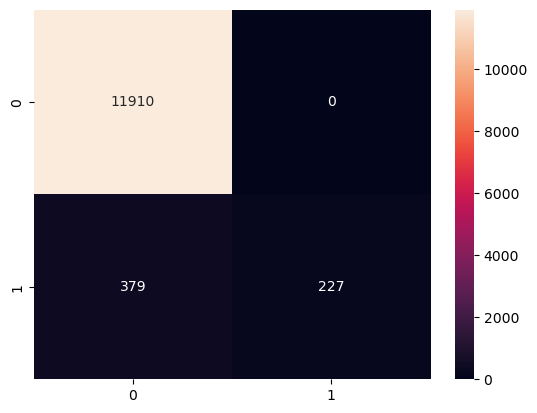

In [27]:
sb.heatmap(confusion_matrix(y_train, y_train_logreg_pred), annot = True, fmt="d")

In [28]:
# Evaluation of model's performance on train set
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_train_logreg_pred))
print("Logistic Regression Recall:", recall_score(y_train, y_train_logreg_pred))
print("Logistic Regression Precision:", precision_score(y_train, y_train_logreg_pred))
print("Logistic Regression F2 score:", fbeta_score(y_train, y_train_logreg_pred, average='binary', beta=2))
print('Logistic Regression ROC AUC Score', roc_auc_score(y_train, y_train_logreg_pred))

Logistic Regression Accuracy: 0.9697187599872163
Logistic Regression Recall: 0.37458745874587457
Logistic Regression Precision: 1.0
Logistic Regression F2 score: 0.4281403244058846
Logistic Regression ROC AUC Score 0.6872937293729373


#### Predict on test set

In [29]:
y_test_logreg_pred = logreg.predict(X_test)

<Axes: >

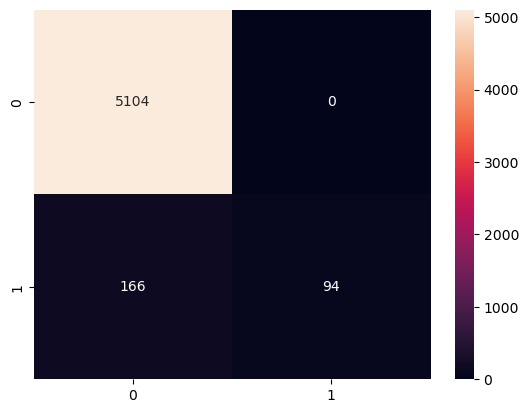

In [30]:
sb.heatmap(confusion_matrix(y_test, y_test_logreg_pred), annot = True, fmt="d")

In [31]:
# Evaluation of model's performance on test set
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_test_logreg_pred))
print("Logistic Regression Recall:", recall_score(y_test, y_test_logreg_pred))
print("Logistic Regression Precision:", precision_score(y_test, y_test_logreg_pred))
print("Logistic Regression F2 score:", fbeta_score(y_test, y_test_logreg_pred, average='binary', beta=2))
print('Logistic Regression ROC AUC Score', roc_auc_score(y_test, y_test_logreg_pred))

Logistic Regression Accuracy: 0.9690529455630127
Logistic Regression Recall: 0.36153846153846153
Logistic Regression Precision: 1.0
Logistic Regression F2 score: 0.41446208112874783
Logistic Regression ROC AUC Score 0.6807692307692308


In [32]:
print("Logistic Regression F1 score:", fbeta_score(y_test, y_test_logreg_pred, average='binary', beta=1))

Logistic Regression F1 score: 0.5310734463276836


## 2. Random Forest

In [33]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

#### Predict on train test

In [34]:
y_fr_train_pred = forest.predict(X_train)

<Axes: >

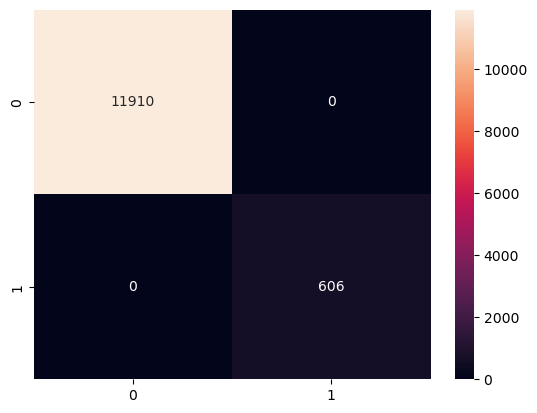

In [35]:
sb.heatmap(confusion_matrix(y_train, y_fr_train_pred), annot = True, fmt="d")

In [36]:
# Evaluation of model's performance on train set
print("Random Forest Accuracy:", accuracy_score(y_train, y_fr_train_pred))
print("Random Forest Recall:", recall_score(y_train, y_fr_train_pred))
print("Random Forest Precision:", precision_score(y_train, y_fr_train_pred))
print("Random Forest F2 score:", fbeta_score(y_train, y_fr_train_pred, average='binary', beta=2))
print('Random Forest ROC AUC Score', roc_auc_score(y_train, y_fr_train_pred))

Random Forest Accuracy: 1.0
Random Forest Recall: 1.0
Random Forest Precision: 1.0
Random Forest F2 score: 1.0
Random Forest ROC AUC Score 1.0


Risk of overfitting

#### Predict on test set

In [37]:
y_fr_test_pred = forest.predict(X_test)

<Axes: >

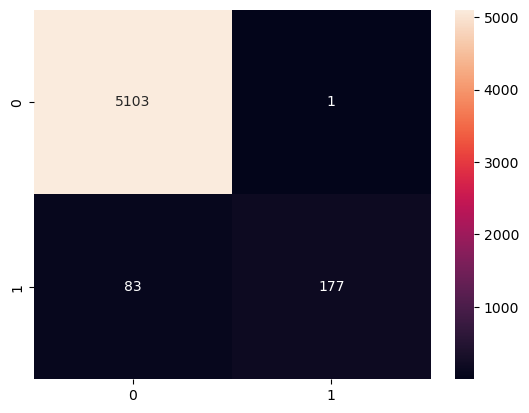

In [38]:
sb.heatmap(confusion_matrix(y_test, y_fr_test_pred), annot = True, fmt="d")

In [39]:
# Evaluation of model's performance on test set
print("Random Forest Accuracy:", accuracy_score(y_test, y_fr_test_pred))
print("Random Forest Recall:", recall_score(y_test, y_fr_test_pred))
print("Random Forest Precision:", precision_score(y_test, y_fr_test_pred))
print("Random Forest F2 score:", fbeta_score(y_test, y_fr_test_pred, average='binary', beta=2))
print('Random Forest ROC AUC Score', roc_auc_score(y_test, y_fr_test_pred))

Random Forest Accuracy: 0.9843400447427293
Random Forest Recall: 0.6807692307692308
Random Forest Precision: 0.9943820224719101
Random Forest F2 score: 0.7266009852216749
Random Forest ROC AUC Score 0.8402866530021703


## 3. Support Vector Machine

#### a. Apply Argument Class Weight on Imbalanced Data

In [40]:
svm = SVC(class_weight='balanced')
svm.fit(X_train_imbalanced, y_train_imbalanced)

SVC(class_weight='balanced')

#### Predict on train set

In [41]:
y_svm_train_imbalanced_pred = svm.predict(X_train_imbalanced)

In [42]:
# Evaluation of model's performance on train set
print("SVM Accuracy:", accuracy_score(y_train_imbalanced, y_svm_train_imbalanced_pred))
print("SVM Recall:", recall_score(y_train_imbalanced, y_svm_train_imbalanced_pred))
print("SVM Precision:", precision_score(y_train_imbalanced, y_svm_train_imbalanced_pred))
print("SVM F2 score:", fbeta_score(y_train_imbalanced, y_svm_train_imbalanced_pred, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_train_imbalanced, y_svm_train_imbalanced_pred))

SVM Accuracy: 0.9997603068072867
SVM Recall: 1.0
SVM Precision: 0.9950738916256158
SVM F2 score: 0.9990108803165184
SVM ROC AUC Score 0.9998740554156171


#### Predict on test set

In [43]:
y_svm_test_imbalanced_pred = svm.predict(X_test)

<Axes: >

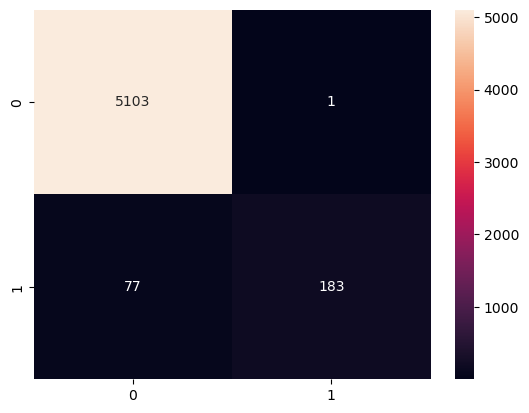

In [44]:
sb.heatmap(confusion_matrix(y_test, y_svm_test_imbalanced_pred), annot = True, fmt="d")

In [45]:
# Evaluation of model's performance on test set
print("SVM Accuracy:", accuracy_score(y_test, y_svm_test_imbalanced_pred))
print("SVM Recall:", recall_score(y_test, y_svm_test_imbalanced_pred))
print("SVM Precision:", precision_score(y_test, y_svm_test_imbalanced_pred))
print("SVM F2 score:", fbeta_score(y_test, y_svm_test_imbalanced_pred, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_test, y_svm_test_imbalanced_pred))

SVM Accuracy: 0.9854586129753915
SVM Recall: 0.7038461538461539
SVM Precision: 0.9945652173913043
SVM F2 score: 0.7475490196078433
SVM ROC AUC Score 0.8518251145406319


#### b. Balanced data by SMOTE

In [46]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

This model takes the longest to run.

#### Predict on train set

In [47]:
y_svm_train_pred = svm.predict(X_train)

<Axes: >

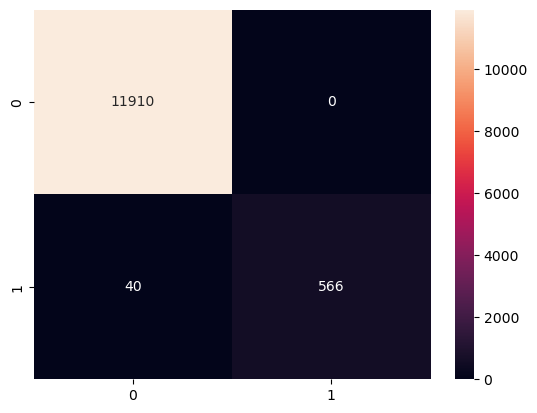

In [48]:
sb.heatmap(confusion_matrix(y_train, y_svm_train_pred), annot = True, fmt="d")

In [49]:
# Evaluation of model's performance on train set
print("SVM Accuracy:", accuracy_score(y_train, y_svm_train_pred))
print("SVM Recall:", recall_score(y_train, y_svm_train_pred))
print("SVM Precision:", precision_score(y_train, y_svm_train_pred))
print("SVM F2 score:", fbeta_score(y_train, y_svm_train_pred, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_train, y_svm_train_pred))

SVM Accuracy: 0.9968040907638223
SVM Recall: 0.933993399339934
SVM Precision: 1.0
SVM F2 score: 0.9464882943143813
SVM ROC AUC Score 0.966996699669967


#### Predict on test set

In [50]:
y_svm_test_pred = svm.predict(X_test)

<Axes: >

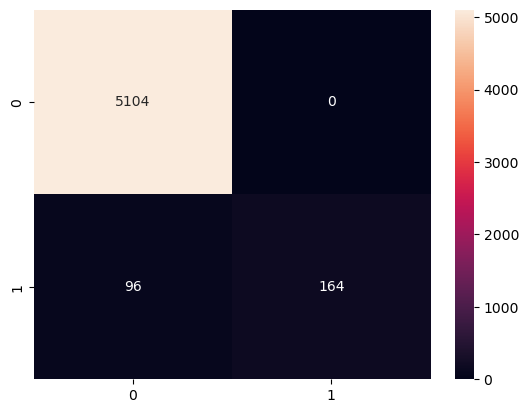

In [51]:
sb.heatmap(confusion_matrix(y_test, y_svm_test_pred), annot = True, fmt="d")

In [52]:
# Evaluation of model's performance on test set
print("SVM Accuracy:", accuracy_score(y_test, y_svm_test_pred))
print("SVM Recall:", recall_score(y_test, y_svm_test_pred))
print("SVM Precision:", precision_score(y_test, y_svm_test_pred))
print("SVM F2 score:", fbeta_score(y_test, y_svm_test_pred, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_test, y_svm_test_pred))

SVM Accuracy: 0.9821029082774049
SVM Recall: 0.6307692307692307
SVM Precision: 1.0
SVM F2 score: 0.6810631229235881
SVM ROC AUC Score 0.8153846153846154


## 4. XGBoost Classifier

In [53]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Predict on train set

In [54]:
y_xgb_train_pred = xgb.predict(X_train)

<Axes: >

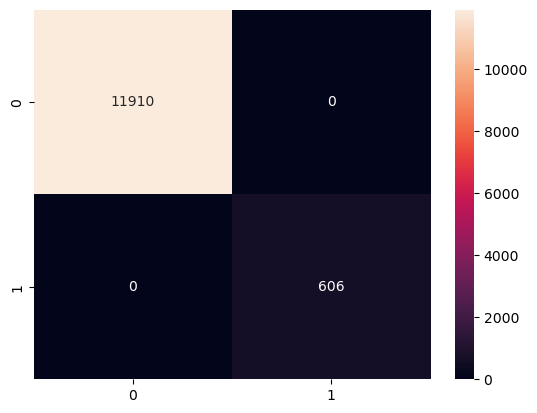

In [55]:
sb.heatmap(confusion_matrix(y_train, y_xgb_train_pred), annot = True, fmt="d")

In [56]:
# Evaluation of model's performance on train set
print("XGB Accuracy:", accuracy_score(y_train, y_xgb_train_pred))
print("XGB Recall:", recall_score(y_train, y_xgb_train_pred))
print("XGB Precision:", precision_score(y_train, y_xgb_train_pred))
print("XGB F2 score:", fbeta_score(y_train, y_xgb_train_pred, average='binary', beta=2))
print('XGB ROC AUC Score', roc_auc_score(y_train, y_xgb_train_pred))

XGB Accuracy: 1.0
XGB Recall: 1.0
XGB Precision: 1.0
XGB F2 score: 1.0
XGB ROC AUC Score 1.0


#### Predict on test set

In [57]:
y_xgb_test_pred = xgb.predict(X_test)

<Axes: >

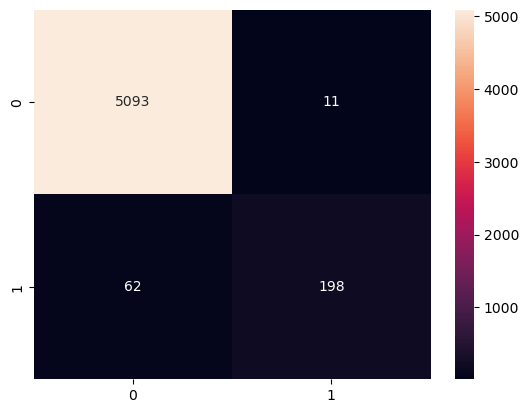

In [58]:
sb.heatmap(confusion_matrix(y_test, y_xgb_test_pred), annot = True, fmt="d")

In [59]:
# Evaluation of model's performance on test set
print("XGB Accuracy:", accuracy_score(y_test, y_xgb_test_pred))
print("XGB Recall:", recall_score(y_test, y_xgb_test_pred))
print("XGB Precision:", precision_score(y_test, y_xgb_test_pred))
print("XGB F2 score:", fbeta_score(y_test, y_xgb_test_pred, average='binary', beta=2))
print('XGB ROC AUC Score', roc_auc_score(y_test, y_xgb_test_pred))

XGB Accuracy: 0.9863907531692767
XGB Recall: 0.7615384615384615
XGB Precision: 0.9473684210526315
XGB F2 score: 0.7926341072858286
XGB ROC AUC Score 0.8796916445623342


In [60]:
print("XGB F1 score:", fbeta_score(y_test, y_xgb_test_pred, average='binary', beta=1))

XGB F1 score: 0.8443496801705757


## 5. KNeighbors Classifier

In [61]:
knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knc.fit(X_train, y_train)

KNeighborsClassifier()

#### Predict on train set

In [62]:
y_knc_train_pred = knc.predict(X_train)

<Axes: >

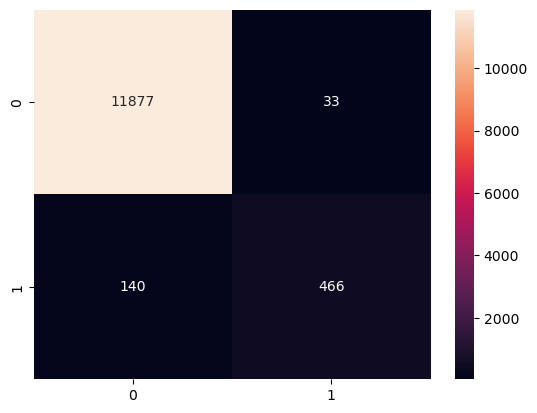

In [63]:
sb.heatmap(confusion_matrix(y_train, y_knc_train_pred), annot = True, fmt="d")

In [64]:
# Evaluation of model's performance on train set
print("KNC Accuracy:", accuracy_score(y_train, y_knc_train_pred))
print("KNC Recall:", recall_score(y_train, y_knc_train_pred))
print("KNC Precision:", precision_score(y_train, y_knc_train_pred))
print("KNC F2 score:", fbeta_score(y_train, y_knc_train_pred, average='binary', beta=2))
print('KNC ROC AUC Score', roc_auc_score(y_train, y_knc_train_pred))

KNC Accuracy: 0.9861776925535315
KNC Recall: 0.768976897689769
KNC Precision: 0.9338677354709419
KNC F2 score: 0.7971262401642148
KNC ROC AUC Score 0.883103058416673


#### Predict on test set

In [65]:
y_knc_test_pred = knc.predict(X_test)

<Axes: >

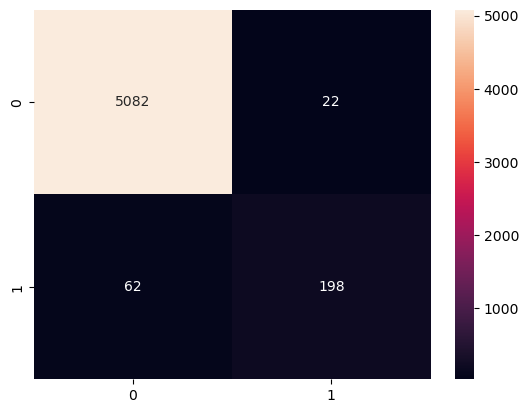

In [66]:
sb.heatmap(confusion_matrix(y_test, y_knc_test_pred), annot = True, fmt="d")

In [67]:
# Evaluation of model's performance on test set
print("KNC Accuracy:", accuracy_score(y_test, y_knc_test_pred))
print("KNC Recall:", recall_score(y_test, y_knc_test_pred))
print("KNC Precision:", precision_score(y_test, y_knc_test_pred))
print("KNC F2 score:", fbeta_score(y_test, y_knc_test_pred, average='binary', beta=2))
print('KNC ROC AUC Score', roc_auc_score(y_test, y_knc_test_pred))

KNC Accuracy: 0.9843400447427293
KNC Recall: 0.7615384615384615
KNC Precision: 0.9
KNC F2 score: 0.7857142857142856
KNC ROC AUC Score 0.8786140583554377


## 6. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Predict on Train set

In [69]:
y_tree_train_pred = dectree.predict(X_train)

<Axes: >

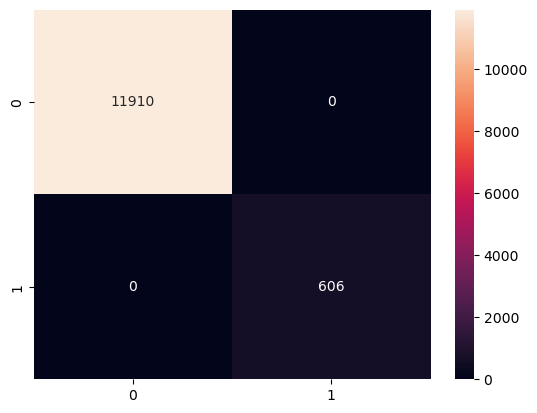

In [70]:
sb.heatmap(confusion_matrix(y_train, y_tree_train_pred), annot = True, fmt="d")

In [71]:
# Evaluation of model's performance on train set
print("Decision Tree Accuracy:", accuracy_score(y_train, y_tree_train_pred))
print("Decision Tree Recall:", recall_score(y_train, y_tree_train_pred))
print("Decision Tree Precision:", precision_score(y_train, y_tree_train_pred))
print("Decision Tree F2 score:", fbeta_score(y_train, y_tree_train_pred, average='binary', beta=2))
print('Decision Tree ROC AUC Score', roc_auc_score(y_train, y_tree_train_pred))

Decision Tree Accuracy: 1.0
Decision Tree Recall: 1.0
Decision Tree Precision: 1.0
Decision Tree F2 score: 1.0
Decision Tree ROC AUC Score 1.0


Risk of overfitting

#### Predict on test set

In [72]:
y_tree_test_pred = dectree.predict(X_test)

<Axes: >

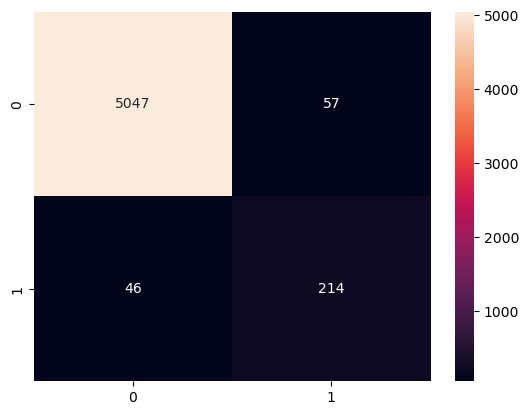

In [73]:
sb.heatmap(confusion_matrix(y_test, y_tree_test_pred), annot = True, fmt="d")

In [74]:
# Evaluation of model's performance on test set
print("Decision Tree Accuracy:", accuracy_score(y_test, y_tree_test_pred))
print("Decision Tree Recall:", recall_score(y_test, y_tree_test_pred))
print("Decision Tree Precision:", precision_score(y_test, y_tree_test_pred))
print("Decision Tree F2 score:", fbeta_score(y_test, y_tree_test_pred, average='binary', beta=2))
print('Decision Tree ROC AUC Score', roc_auc_score(y_test, y_tree_test_pred))

Decision Tree Accuracy: 0.9807979120059657
Decision Tree Recall: 0.823076923076923
Decision Tree Precision: 0.7896678966789668
Decision Tree F2 score: 0.8161708619374523
Decision Tree ROC AUC Score 0.9059546057390885


## Evaluation 6 Models

In [75]:
roc_score = {}
f2_score = {}
rc_score = {}
pr_score = {}

In [76]:
roc_score['Logistic Regression']= roc_auc_score(y_test, y_test_logreg_pred)
roc_score['Random Forest']= roc_auc_score(y_test, y_fr_test_pred)
roc_score['SVM']= roc_auc_score(y_test, y_svm_test_pred)
roc_score['XGBoost']= roc_auc_score(y_test, y_xgb_test_pred)
roc_score['K-Neighbour Classifier']= roc_auc_score(y_test, y_knc_test_pred)
roc_score['Decision Tree']= roc_auc_score(y_test, y_tree_test_pred)

In [77]:
f2_score['Logistic Regression']= fbeta_score(y_test, y_test_logreg_pred, average='binary', beta=2)
f2_score['Random Forest']= fbeta_score(y_test, y_fr_test_pred, average='binary', beta=2)
f2_score['SVM']= fbeta_score(y_test, y_svm_test_pred, average='binary', beta=2)
f2_score['XGBoost']= fbeta_score(y_test, y_xgb_test_pred, average='binary', beta=2)
f2_score['K-Neighbour Classifier']= fbeta_score(y_test, y_knc_test_pred, average='binary', beta=2)
f2_score['Decision Tree']= fbeta_score(y_test, y_tree_test_pred, average='binary', beta=2)

In [78]:
rc_score['Logistic Regression']= recall_score(y_test, y_test_logreg_pred)
rc_score['Random Forest']= recall_score(y_test, y_fr_test_pred)
rc_score['SVM']= recall_score(y_test, y_svm_test_pred)
rc_score['XGBoost']= recall_score(y_test, y_xgb_test_pred)
rc_score['K-Neighbour Classifier']= recall_score(y_test, y_knc_test_pred)
rc_score['Decision Tree']= recall_score(y_test, y_tree_test_pred)

In [79]:
pr_score['Logistic Regression']= precision_score(y_test, y_test_logreg_pred)
pr_score['Random Forest']= precision_score(y_test, y_fr_test_pred)
pr_score['SVM']= precision_score(y_test, y_svm_test_pred)
pr_score['XGBoost']= precision_score(y_test, y_xgb_test_pred)
pr_score['K-Neighbour Classifier']= precision_score(y_test, y_knc_test_pred)
pr_score['Decision Tree']= precision_score(y_test, y_tree_test_pred)

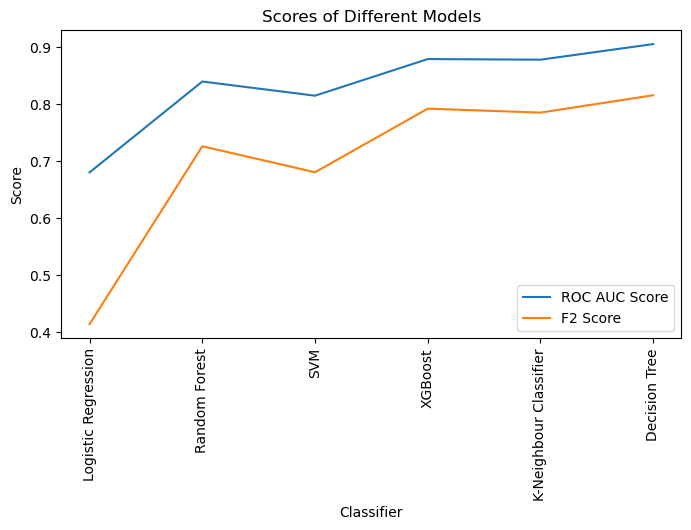

In [80]:
#Plot ROC AUC Score and F2 Score
plt.figure(figsize=(8, 4))
plt.plot(list(roc_score.values()));
plt.plot(list(f2_score.values()));
plt.xticks(ticks=range(0, len(roc_score)), labels=roc_score.keys(), rotation=90);
plt.title('Scores of Different Models');
plt.xlabel('Classifier');
plt.ylabel('Score');
plt.legend(['ROC AUC Score', 'F2 Score'], fontsize='medium');

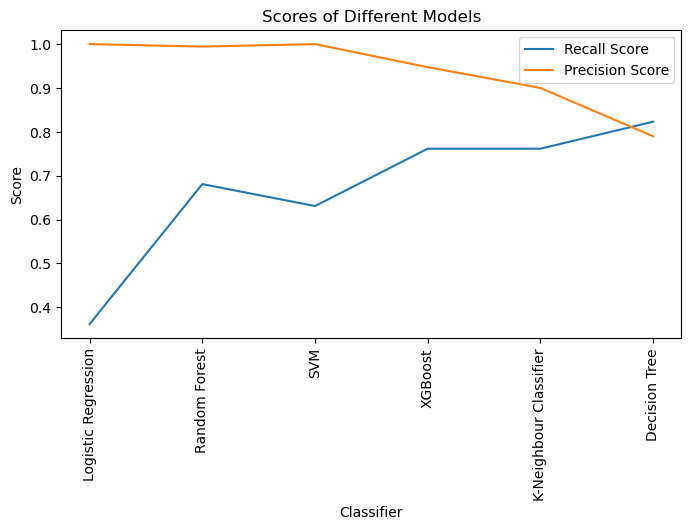

In [81]:
#Plot Recall and Precision Score
plt.figure(figsize=(8, 4))
plt.plot(list(rc_score.values()));
plt.plot(list(pr_score.values()));
plt.xticks(ticks=range(0, len(rc_score)), labels=roc_score.keys(), rotation=90);
plt.title('Scores of Different Models');
plt.xlabel('Classifier');
plt.ylabel('Score');
plt.legend(['Recall Score', 'Precision Score'], fontsize='medium');


# Conclusion

Since want to use minimize False Negative (incorrectly predict fraudulent jobs as non-fraudulent), we pay more attention to Recall and F2 score. When there are more than 1 model with approximately the same recall and F2 score, we take other evaluation metrics (accuracy, prediction, F1 score, AUC ROC score) in to consideration.

We can see that **Logistic Regression model** has the best overall performance on the test set among all the models.

# References

https://analyticsindiamag.com/classifying-fake-and-real-job-advertisements-using-machine-learning/ <br>
https://www.kaggle.com/code/shivamburnwal/nlp-98-acc-eda-with-model-using-spacy-pipeline <br>
https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/ <br>
https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640 <br>
https://docs.streamlit.io/library/cheatsheet <br>
https://stats.stackexchange.com/questions/251871/vectorization-of-data-before-splitting-in-to-test-and-train-with-neural-network <br>
https://towardsdatascience.com/boosting-techniques-in-python-predicting-hotel-cancellations-62b7a76ffa6c <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html <br>
https://machinelearningmastery.com/fbeta-measure-for-machine-learning/ <br>
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ <br>
https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=Oversampling%20methods%20duplicate%20or%20create,of%20methods%20are%20used%20together <br>
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=the%20multiclass%20model%3F-,What%20is%20the%20AUC%20%2D%20ROC%20Curve%3F,capable%20of%20distinguishing%20between%20classes. <br>
https://scikit-learn.org/stable/model_persistence.html <br>